In [149]:
import natsort
import glob
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [150]:
#glob.glob('underworld2/results/A/**/metrics.csv'), glob.glob('underworld2/results/A/**/solver.csv')
#glob.glob('underworld2/results/C/**/*.csv')

In [151]:
mHeaders = ['rmsint', 'shearArea' ,'shearPressure', 'backgroundArea', 'backgroundPressure', 
            'viscmin', 'viscmax', 'eiimin', 'eiimax', 'angle', 'vdint', 'shearVd', 'backgroundVd', 'pressmin', 'pressmax' ]

pHeaders = ['U0','a','asthenosphere','cohesion','depth','eta1','eta2','etaMin','fa','g','notchWidth','rho']

In [152]:
#natsort.natsorted(glob.glob('../underworld2/results/A/**/metrics.csv'))

In [153]:
def get_data(path1, path2):
    data = []
    params = []
    metricFiles = natsort.natsorted(glob.glob(path1))
    paramFiles = natsort.natsorted(glob.glob(path2))
    print(len(metricFiles))
    
    for i in range(len(metricFiles)):
        d = pd.read_csv(metricFiles[i], header=None)
        d.columns = mHeaders
        p = pd.read_csv(paramFiles[i], header=None, skip_footer=1)
        p.columns = pHeaders 
        data.append(d)
        params.append(p)

    return data, params


In [154]:
dataA, paramsA = get_data('../underworld2/results/A/**/metrics.csv', '../underworld2/results/A/**/params.csv')
dataB, paramsB = get_data('../underworld2/results/B/**/metrics.csv', '../underworld2/results/B/**/params.csv')
dataC, paramsC = get_data('../underworld2/results/C/**/metrics.csv', '../underworld2/results/C/**/params.csv')

6
6
6


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: FutureWarning: The 'skip_footer' argument has been deprecated and will be removed in a future version. Please use the 'skipfooter' argument instead.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


```
counter=1
c=1.0
for a in 1.0 0.8 0.6 0.4 0.2 0.1
do
   b=$(echo "$c/$a" | bc -l)
   docker run -v $PWD:/workspace  -i -t --rm dansand/underworld2-dev mpirun -np 16 python isotropic.py A $counter md.res=96 dp.eta1*=$a dp.eta2*=$a dp.U0*=$b
   #docker run -v $PWD:/workspace  -i -t --rm dansand/underworld2-dev mpirun -np 16 python isotropic.py B $counter md.res=96 dp.eta1*=$a dp.eta2*=1. dp.U0*=$b
   #docker run -v $PWD:/workspace  -i -t --rm dansand/underworld2-dev mpirun -np 16 python isotropic.py C $counter md.res=96 dp.eta1*=1.0 dp.eta2*=$a dp.U0*=1.0
   #echo $a $b
   let counter=counter+1
done

```

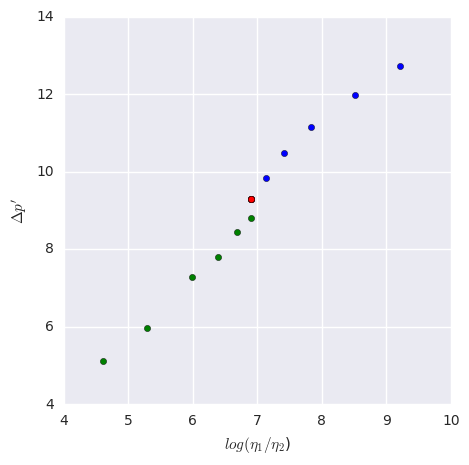

In [155]:
fig, ax = plt.subplots(figsize=(5,5))




for i in range(0,len(dataA)):
    ax.scatter(np.log((paramsA[i]['eta1'][1]/paramsA[i]['eta2'][1])), dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r')
    ax.scatter(np.log((paramsB[i]['eta1'][1]/paramsB[i]['eta2'][1])), dataB[i]['pressmax'] - dataB[i]['pressmin'], c='g')
    ax.scatter(np.log((paramsC[i]['eta1'][1]/paramsC[i]['eta2'][1])), dataC[i]['pressmax'] - dataC[i]['pressmin'], c='b')


    #ax.scatter((paramsB[i]['eta1'][1]/paramsB[i]['eta2'][1])/(paramsB[i]['U0'][1]*paramsB[i]['eta1'][1]), dataB[i]['pressmax'] - dataB[i]['pressmin'], c='g')



ax.set_xlabel('$log(\eta_1 / \eta_2$)')
ax.set_ylabel("$\Delta p'$")



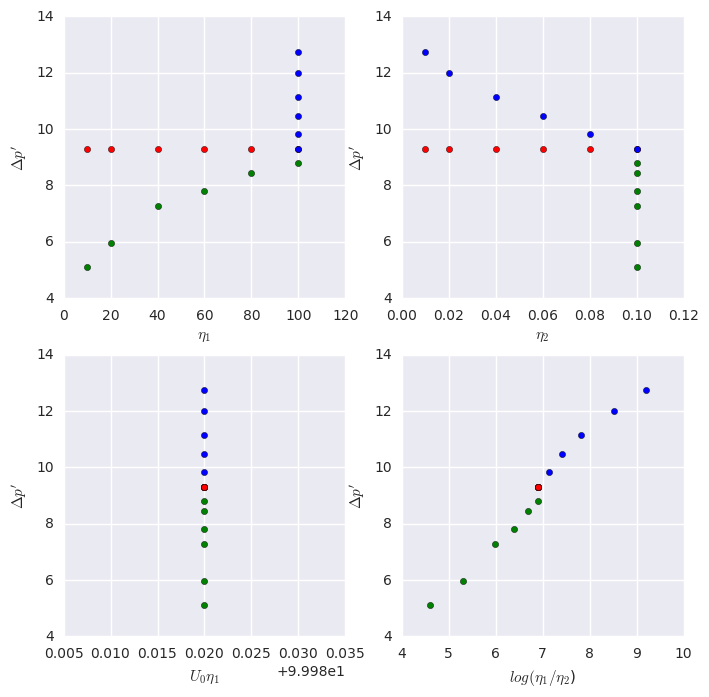

In [156]:
#fig, (ax0, ax1), (ax2, ax3) = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

fig = plt.figure(figsize=(8, 8))
ax0 = plt.subplot(2, 2, 1)


for i in range(0,len(dataA)):
    ax0.scatter((paramsA[i]['eta1'][1]), dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r')
    ax0.scatter((paramsB[i]['eta1'][1]), dataB[i]['pressmax'] - dataB[i]['pressmin'], c='g')
    ax0.scatter((paramsC[i]['eta1'][1]), dataC[i]['pressmax'] - dataC[i]['pressmin'], c='b')

ax0.set_xlabel('$\eta_1$')
ax0.set_ylabel("$\Delta p'$")    

ax1 = plt.subplot(2, 2, 2)

for i in range(0,len(dataA)):
    ax1.scatter((paramsA[i]['eta2'][1]), dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r')
    ax1.scatter((paramsB[i]['eta2'][1]), dataB[i]['pressmax'] - dataB[i]['pressmin'], c='g')
    ax1.scatter((paramsC[i]['eta2'][1]), dataC[i]['pressmax'] - dataC[i]['pressmin'], c='b')

ax1.set_xlabel('$\eta_2$')
ax1.set_ylabel("$\Delta p'$")  
 
    
ax2 = plt.subplot(2, 2, 3)    
#ax2.get_xaxis().get_major_formatter().set_scientific(False)
for i in range(0,len(dataA)):
    ax2.scatter(paramsA[i]['U0'][1]*(paramsA[i]['eta1'][1]), dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r')
    ax2.scatter(paramsB[i]['U0'][1]*(paramsB[i]['eta1'][1]), dataB[i]['pressmax'] - dataB[i]['pressmin'], c='g')
    ax2.scatter(paramsC[i]['U0'][1]*(paramsC[i]['eta1'][1]), dataC[i]['pressmax'] - dataC[i]['pressmin'], c='b')


ax2.set_xlabel('$U_0\eta_1$')
ax2.set_ylabel("$\Delta p'$")


ax3 = plt.subplot(2, 2, 4)

for i in range(0,len(dataA)):
    ax3.scatter(np.log((paramsA[i]['eta1'][1]/paramsA[i]['eta2'][1])), dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r')
    ax3.scatter(np.log((paramsB[i]['eta1'][1]/paramsB[i]['eta2'][1])), dataB[i]['pressmax'] - dataB[i]['pressmin'], c='g')
    ax3.scatter(np.log((paramsC[i]['eta1'][1]/paramsC[i]['eta2'][1])), dataC[i]['pressmax'] - dataC[i]['pressmin'], c='b')

ax3.set_xlabel('$log(\eta_1 / \eta_2$)')
ax3.set_ylabel("$\Delta p'$")
#ax.set_xscale('log')
#ax.legend(loc=4, prop={'size':8})

#fig.savefig('pressures.png')

In [40]:
ax.scatter(paramsA[i]['eta1'][1], dataA[i]['pressmax'] - dataA[i]['pressmin'])

In [45]:
dataA[4]['pressmax'] - dataA[4]['pressmin'],

(0    9.303622
 dtype: float64,)